# Séries Temporais

- O que é uma Série Temporal?
- Componentes de Séries Temporais
- Estacionariedade
- Resíduos de ST
- Biblioteca tsa (statistic models)

## O que é uma Série Temporal?

Uma série temporal é definida como um conjunto de valores que se modificam em intervalos iguais de tempo.

Exemplo de séries temporais:

* Valor de ativos na bolsa de valores;
* População de um país;
* Demanda por um determinado produto;
* Consumo de energia elétrica de um condomínio;
* Demanda de empréstimo de um banco ao longo do ano.

Normalmente, o conceito é usado para:

* Identificar a natureza do fenômeno representado pela sequência de observações para encontrar padrões de comportamentos;
* Usar modelos estatísticos para prever valores futuros, baseando-se em resultados do passado.

Normalmente, não usamos técnicas tradicionais diretamente para modelar um problema com séries.


## Componentes de uma Série Temporal

Como não usamos modelos tradicionais na previsão de séries temporais, precisamos conhecer seus componentes básicos:

* Tendência;
* Sazonalidade;
* Cíclos;
* Erro Aleatório.

#### Tendência: 

Significa saber se uma série está crescendo, diminuindo ou está estável.

![](https://miro.medium.com/max/700/0*xsXGX-Zq0jD4Fv5w)

**Importância:**

Identificar a tendência a curto, médio ou longo prazo para tomada de decisão.

**Exemplo:** Dados sobre a Covid-19: aumentando (isolamento), diminuindo (liberar restrições).

#### Sazonalidade:

A sazonalidade é observada por meio de flutuações periódicas, fenômenos que se repetem nos dados a cada período de tempo idêntico.

![](https://miro.medium.com/max/694/0*CIkkchfuwEhG5BY3)

**Exemplo:**

* Venda de panetones em dezembro (não só de um ano);
* Vendas de roupas de banho no verão.

#### Ciclos:

Os ciclos são aumentos ou redução da frequência, mas sem intervalos fixos (diferente da sazonalidade).

![](https://miro.medium.com/max/414/0*TgyRjXMrrqy4dSjg)

**Exemplos:**

#### Erro aleatório:

São flutuações inexplicáveis, resultando de fatos fortuitos e inesperados: catastrofes naturais, atentados terroristas, pandemias, etc.

In [1]:
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")

In [3]:
# to explicitly convert the date column to type DATETIME
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [4]:
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
import matplotlib.pyplot as plt

In [7]:
series = data['Consumption'][0:365]

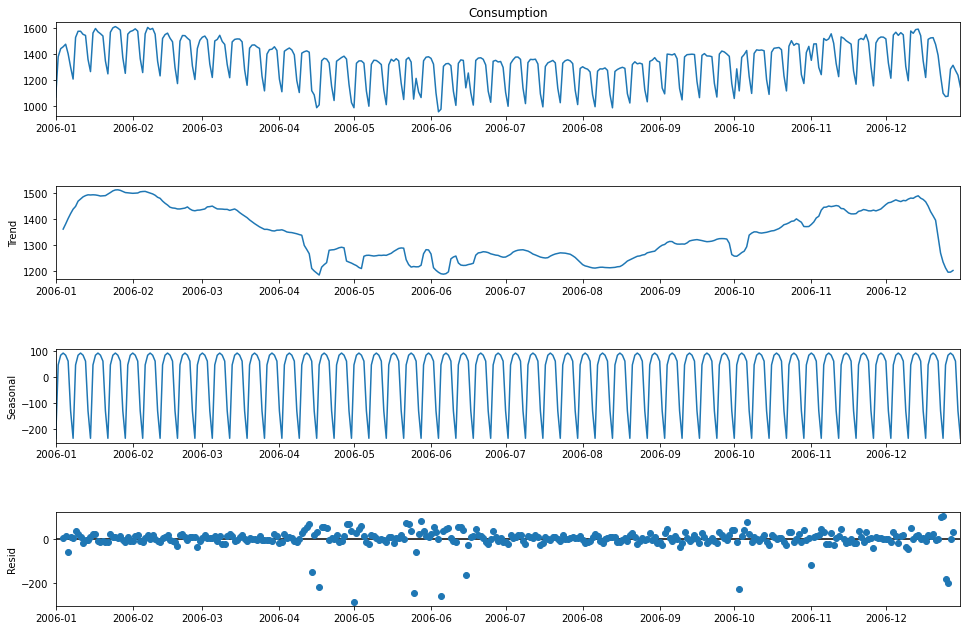

In [10]:
result = seasonal_decompose(series, model='additive')
fig = result.plot()
fig.set_size_inches((15, 10))
plt.show()

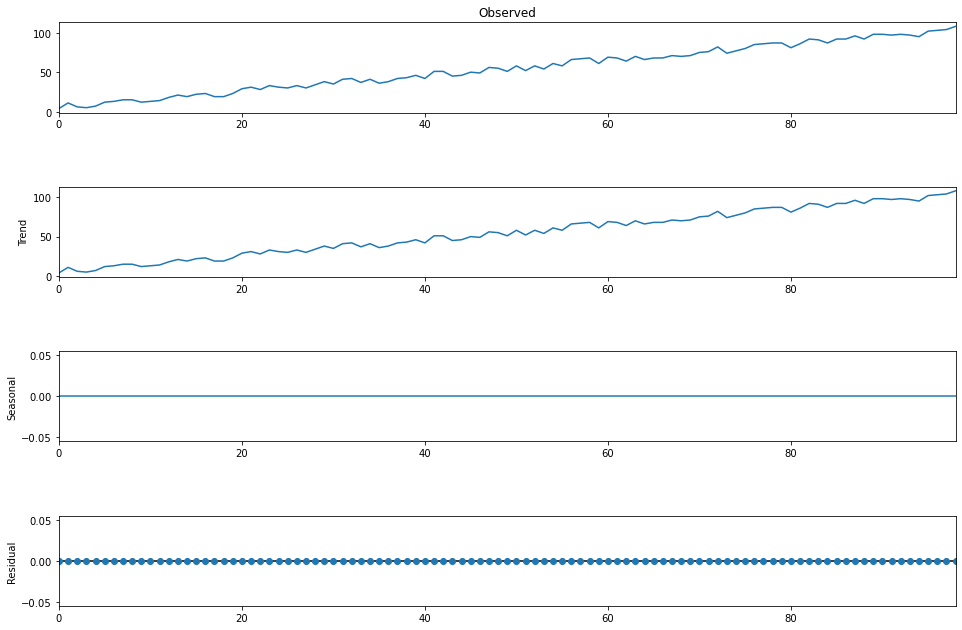

In [11]:
from random import randrange
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
fig = result.plot()
fig.set_size_inches((15, 10))
plt.show()

### Estacionariedade

Uma série temporal é dita estacionária se a sua média, variância e a estrutura de autocorrelação se mantém constantes durante o tempo.

**Série Estacionária:**

![](https://miro.medium.com/max/700/0*v75pu2acoVnrUARn)

**Série Não Estacionária:**

![](https://miro.medium.com/max/700/0*_PUTsVZRiAOwbsdJ)

Para conseguir saber se uma série é estacionária, podemos realizar alguns testes estatísticos:

* Teste de Dickey-Fuller;
* Teste Kpss;
* Teste Philips perron.



#### Teste de Dickey-Fuller

É realizado um teste de hipótese, selecionando uma amostra de dados e realizando inferência sobre uma determinada população de dados.

**Objetivo:** Avaliar se os dados são estacionários ou não.

**Teste:** Formular a hipótese nula e a alternativa.

**Resposta:** Não rejeição da estacionariedade da série se o p-valor for menos que o α (ex.: 0.05).

**Exemplo :** Os ganhos diários líquidos de um jogador de pequeno porte estão listados na tabela abaixo. Use o teste de Dickey-Fuller para determinar se a série temporal é estacionária.

|Time|Ganho diário (y)|$Δy|
|:--:|:--------------:|:-:|
|1|50||
|2|120.83|70.83|
|3|-25.43|-146.26|
|4|31.72|57.15|
|5|94.79|63.07|
|6|61.06|33.73|
|7|87.51|26.45|
|8|-65.88|-153.39|
|9|30.40|96.28|
|10|65.49|35.09|
|11|15.13|-50.36|
|12|8.23|-6.90|
|13|-18.71|-26.94|
|14|-29.79|-11.08|
|15|-97.00|-67.21|
|16|42.43|139.43|
|17|258.70|216.27|
|18|6.83|-251.87|
|19|45.63|38.80|
|20|-56.41|-102.04|
|21|-101.23|-44.82|
|22|-141.21|-41.98|
|23|-286.78|-143.57|
|24|-197.79|88.99|
|25|-236.75|-38.96|

In [ ]:
#Usando 95% de confiança

#### E se uma série não for estacionária. O que fazer?

No mundo real, é muito difícil obtermos uma série estacionária, pois o mundo é transiente e as variáveis alteram ao longo do tempo (pandemias, crises, etc.).

Contudo, a estacionariedade é importante, pois existem técnicas analíticas de séries temporais que dependem da estacionariedade da série para funcionarem. Se a série não for estacionária, podemos transformá-la de alguma forma a torná-la estacionária.

**Diferenças Sucessivas:**

É a transformação mais comum de uma série temporal, visando torná-la estacionária.

*Outras transformações:* Logarítmica.